# Processing of US Coastguard GPS disruption data

## Prerequisites

### Installs

In [26]:
%pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.1 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Imports

In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
from unidecode import unidecode


## Webscrape
Run this to webscrape the data to files. If you already have the data locally, skip this section.

### Web scrape GPS interruptions

In [2]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

### Web scrape wikipedia 
#### US state codes

In [2]:
table_list_iso3166= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')

In [4]:
US_states_iso3166=table_list_iso3166[0]
US_states_iso3166['clean_state']=US_states_iso3166['Code'].apply(lambda x: x.split('-')[1])
US_states_iso3166.to_csv('US_states_iso3166.csv',index=False)

#### List of sovereign states

In [7]:
sovereign_states_list= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2')[2]
sovereign_states_list[sovereign_states_list['Country name (using title case)'].notna()].to_csv('sovereign_states.csv',index=False)

#### Web scrape UN LOCODE

In [4]:
un_locode_df= pd.read_html(r'https://service.unece.org/trade/locode/2022-1%20SubdivisionCodes.htm')

In [5]:
un_locode_df[0].to_csv('UN_LOCODE.csv',index=False)

In [8]:
un_locode_list=[]
for country_code in sovereign_states_list[sovereign_states_list.Code.notna()]['Code']:
    try:
        df_list=pd.read_html('https://service.unece.org/trade/locode/'+country_code.lower()+'.htm', header=0)
        un_locode_list.append(df_list[2])
    except:
        print('issues finding',country_code)

issues finding BV


In [9]:
un_locode_detail_webscraped=pd.concat(un_locode_list)

In [10]:
un_locode_detail_webscraped.to_csv('UN_locode_detail.csv',index=False)

## Processing and Analysis

### Load from csv files

In [3]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')
two_letter_codes=pd.read_csv('US_states_iso3166.csv')
sovereign_states=pd.read_csv('sovereign_states.csv')
UN_locodes=pd.read_csv('UN_LOCODE.csv')
UN_locodes_detail=pd.read_csv('UN_locode_detail.csv')


In [4]:
gps_disruption_df['User']=gps_disruption_df['Description'].apply(lambda x: x.split('NAVCEN')[0])
gps_disruption_df['NAVCEN']=gps_disruption_df['Description'].apply(lambda x: x.split('NAVCEN')[1] if len(x.split('NAVCEN'))>1 else '')

In [5]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,USER: My mapping services are constantly searc...,sent data mapping information.
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022,"USER: For several years now, on and off throug...",: The GPS Operations Center reviewed the GPS C...
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022,USER: Our car navigation system and our mobile...,: The GPS Operations Center reviewed the GPS C...
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022,USER: Both my standalone gps and phone gps rep...,: The GPS Operations Center reviewed the GPS C...
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022,"USER: Several times, most recently yesterday, ...",sent data mapping information.
...,...,...,...,...,...,...,...,...
414,01/05/2017 4:35 UTC,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019,User: There were large spikes in geozone alarm...,: The GPS Operations Center reviewed the GPS C...
415,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,User: The GPS systems in normal mode not milit...,: Report referred to FCC. FCC conducted an inv...
416,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,User: GPS would say when you plug in that ther...,: The GPS Operations Center reviewed the GPS C...
417,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,"User: My business is located in Elizabeth, NJ....",: User provided information on how to contact ...


## Analyse disruptions by date

In [6]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

The local date is the UTC date with up to 0.5 day error. That's not bad for analysis to the nearest day. This will have to be improved for more precise analysis.

<AxesSubplot: xlabel='local_date'>

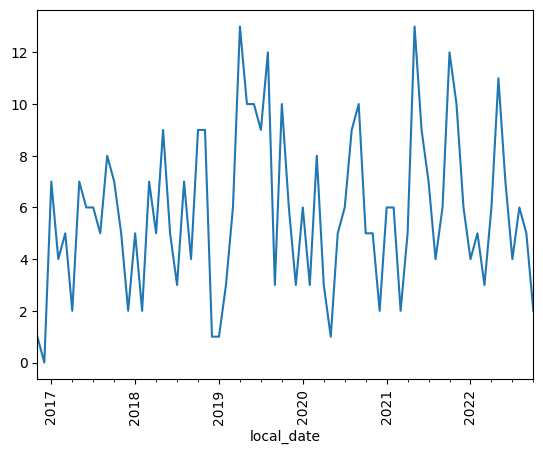

In [7]:
gps_disruption_df.resample('M', on='local_date').\
count()['Disruption Date/Time'].plot(rot=90)


## Analyse disruptions by location

### Add UK and US to two letter codes

In [8]:
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"GB",'Subdivision name (en)':"United Kingdom",'Subdivision category':"Country",'clean_state':"UK"},index=[two_letter_codes['Code'].count()])])
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"US",'Subdivision name (en)':"United States",'Subdivision category':"Country",'clean_state':"US"},index=[two_letter_codes['Code'].count()])])

### Add previous and common names to ISO list

In [9]:
sovereign_states['previous country name']=\
sovereign_states['Notes']\
.apply(lambda x: str(x)\
       .split('Previous ISO country name: ')[-1]\
       .split('(')[0]\
       .split(';')[0]\
       .split('.')[0]\
       .strip() \
       if 'Previous ISO country name: ' in str(x) \
       else None ) 


In [10]:
sovereign_states['common name']=\
sovereign_states['Notes']\
.apply(lambda x: str(x)\
       .split('common name: ')[-1]\
       .strip()\
       .split(')')[0] \
       if 'common name: ' in str(x) \
       else None )

In [11]:
sovereign_states[sovereign_states['previous country name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
27,BN,Brunei Darussalam,1974,.bn,Previous ISO country name: Brunei,Brunei,None
28,BO,Bolivia (Plurinational State of),1974,.bo,Previous ISO country name: Bolivia,Bolivia,None
29,BQ,"Bonaire, Sint Eustatius and Saba",2010,.bq,"Consists of three Caribbean ""special municipal...","Bonaire, Saint Eustatius and Saba BQ previous...",None
46,CM,Cameroon,1974,.cm,"Previous ISO country name: Cameroon, United Re...","Cameroon, United Republic of",None
55,CZ,Czechia,1993,.cz,Previous ISO country name: Czech Republic,Czech Republic,None
65,EH,Western Sahara,1974,NaN,Previous ISO country name: Spanish Sahara (cod...,Spanish Sahara,None
72,FM,Micronesia (Federated States of),1986,.fm,Previous ISO country name: Micronesia,Micronesia,None
76,GB,United Kingdom of Great Britain and Northern I...,1974,.gb (.uk),Includes Akrotiri and Dhekelia (Sovereign Base...,United Kingdom,None
107,IR,Iran (Islamic Republic of),1974,.ir,Previous ISO country name: Iran,Iran,None
116,KH,Cambodia,1974,.kh,Code taken from former name: Khmer Republic P...,"Kampuchea, Democratic",None


In [12]:
sovereign_states[sovereign_states['common name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
71,FK,Falkland Islands (Malvinas),1974,.fk,ISO country name follows UN designation due to...,None,Falkland Islands
120,KP,Korea (Democratic People's Republic of),1974,.kp,ISO country name follows UN designation (commo...,None,North Korea
121,KR,"Korea, Republic of",1974,.kr,ISO country name follows UN designation (commo...,None,South Korea
190,RU,Russian Federation,1992,.ru,ISO country name follows UN designation (commo...,None,Russia
227,TW,"Taiwan, Province of China",1974,.tw,Covers the current jurisdiction of the Republi...,None,Taiwan
240,VN,Viet Nam,1974,.vn,ISO country name follows UN designation (commo...,None,South Vietnam


In [13]:
UN_locodes_detail[UN_locodes_detail.notna()]

,Ch,LOCODE,Name,NameWoDiacritics,SubDiv,Function,Status,Date,IATA,Coordinates,Remarks
0,NaN,AD ALV,Andorra la Vella,Andorra la Vella,NaN,--34-6--,AI,601.0,NaN,4230N 00131E,NaN
1,NaN,AD CAN,Canillo,Canillo,NaN,--3-----,RL,307.0,NaN,4234N 00135E,NaN
2,NaN,AD ENC,Encamp,Encamp,NaN,--3-----,RL,307.0,NaN,4232N 00134E,NaN
3,NaN,AD ESC,Escaldes-Engordany,Escaldes-Engordany,NaN,--3-----,RL,307.0,NaN,4231N 00133E,NaN
4,NaN,AD EAC,Escàs,Escas,4.0,--3-----,RL,1407.0,NaN,4233N 00131E,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115750,NaN,ZW STH,Southerton,Southerton,NaN,--3-----,RL,201.0,NaN,1751S 03101E,NaN
115751,NaN,ZW THJ,Thompson Junction,Thompson Junction,NaN,-23-----,RL,701.0,NaN,1800S 02626E,NaN
115752,NaN,ZW VFA,Victoria Falls,Victoria Falls,NaN,---4----,AI,9501.0,NaN,NaN,NaN
115753,NaN,ZW ZMZ,Zimbabwe,Zimbabwe,MV,1-3-----,RL,1401.0,NaN,2016S 03055E,NaN


In [14]:
UN_locodes_detail['locode']=UN_locodes_detail.LOCODE.str.replace(' ','-')
UN_locodes_detail['namewod_len']=UN_locodes_detail[UN_locodes_detail['NameWoDiacritics'].notna()]['NameWoDiacritics'].apply(len)

In [15]:
UN_locodes['primary name']=UN_locodes['2'].apply(lambda x: unidecode(x.strip().split('[')[0]))
UN_locodes['placename_decoded']=UN_locodes['primary name'].apply(unidecode)
UN_locodes['placename_len']=UN_locodes['placename_decoded'].apply(len)
UN_locodes['alternative name']=UN_locodes['2'].apply(lambda x: unidecode(x.strip().split('[')[1].split(']')[0]) if len(x.strip().split('['))>1 else None)
UN_locodes['alternative_len']=UN_locodes[UN_locodes['alternative name'].notna()]['alternative name'].apply(len)
UN_locodes['locode']=UN_locodes['0']+'-'+UN_locodes['1']

In [16]:
UN_locodes[UN_locodes['primary name'].notna()].notna().count()['primary name']

4671

In [17]:
UN_locodes['second_code']=UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name'].str.rpartition()[2].str.partition(sep='-')[0]
UN_locodes['clean alternative name']=UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name'].str.rpartition()[0].apply(lambda x: x.strip())#.str.partition(sep='-')[0]

UN_locodes[UN_locodes['second_code']==UN_locodes['0']]

,0,1,2,3,primary name,placename_decoded,placename_len,alternative name,alternative_len,locode,second_code,clean alternative name
1216,GB,AGY,Isle of Anglesey [Sir Ynys Môn GB-YNM],Unitary authority,Isle of Anglesey,Isle of Anglesey,17,Sir Ynys Mon GB-YNM,19.0,GB-AGY,GB,Sir Ynys Mon
1228,GB,BGE,Bridgend [Pen-y-bont ar Ogwr GB-POG],Unitary authority,Bridgend,Bridgend,9,Pen-y-bont ar Ogwr GB-POG,25.0,GB-BGE,GB,Pen-y-bont ar Ogwr
1243,GB,CAY,Caerphilly [Caerffili GB-CAF],Unitary authority,Caerphilly,Caerphilly,11,Caerffili GB-CAF,16.0,GB-CAY,GB,Caerffili
1253,GB,CMN,Carmarthenshire [Sir Gaerfyrddin GB-GFY],Unitary authority,Carmarthenshire,Carmarthenshire,16,Sir Gaerfyrddin GB-GFY,22.0,GB-CMN,GB,Sir Gaerfyrddin
1256,GB,CRF,Cardiff [Caerdydd GB-CRD],Unitary authority,Cardiff,Cardiff,8,Caerdydd GB-CRD,15.0,GB-CRF,GB,Caerdydd
1261,GB,DEN,Denbighshire [Sir Ddinbych GB-DDB],Unitary authority,Denbighshire,Denbighshire,13,Sir Ddinbych GB-DDB,19.0,GB-DEN,GB,Sir Ddinbych
1284,GB,FLN,Flintshire [Sir y Fflint GB-FFL],Unitary authority,Flintshire,Flintshire,11,Sir y Fflint GB-FFL,19.0,GB-FLN,GB,Sir y Fflint
1331,GB,MON,Monmouthshire [Sir Fynwy GB-FYN],Unitary authority,Monmouthshire,Monmouthshire,14,Sir Fynwy GB-FYN,16.0,GB-MON,GB,Sir Fynwy
1334,GB,MTY,Merthyr Tydfil [Merthyr Tudful GB-MTU],Unitary authority,Merthyr Tydfil,Merthyr Tydfil,15,Merthyr Tudful GB-MTU,21.0,GB-MTY,GB,Merthyr Tudful
1347,GB,NTL,Neath Port Talbot [Castell-nedd Port Talbot GB...,Unitary authority,Neath Port Talbot,Neath Port Talbot,18,Castell-nedd Port Talbot GB-CTL,31.0,GB-NTL,GB,Castell-nedd Port Talbot


In [18]:
UN_locodes['alternative name'].unique()

array([None, 'Abu Dhabi', 'Dubai', 'Sharjah', 'Barcelona', 'La Coruna',
       'Gerona', 'Lerida', 'Lugo', 'Orense', 'Islas Baleares',
       'Pontevedra', 'Tarragona', 'Sir Ynys Mon GB-YNM',
       'Pen-y-bont ar Ogwr GB-POG', 'Caerffili GB-CAF', 'Sir Ceredigion',
       'Sir Gaerfyrddin GB-GFY', 'Caerdydd GB-CRD', 'Sir Ddinbych GB-DDB',
       'Sir y Fflint GB-FFL', 'Sir Fynwy GB-FYN', 'Merthyr Tudful GB-MTU',
       'Castell-nedd Port Talbot GB-CTL', 'Casnewydd GB-CNW',
       'Sir Benfro GB-BNF', 'Rhondda CynonTaf', 'Abertawe GB-ATA',
       'Tor-faen', 'Bro Morgannwg GB-BMG', 'Wrecsam GB-WRC', 'Hokkaido',
       'Fukushima', 'Tochigi', 'Chiba', 'Tokyo', 'Ishikawa', 'Fukui',
       'Yamanashi', 'Gifu', 'Shizuoka', 'Aichi', 'Shiga', 'Kyoto',
       'Osaka', 'Hyogo', 'Shimane', 'Hiroshima', 'Yamaguchi', 'Tokushima',
       'Kochi', 'Fukuoka', 'Oita', 'Kagoshima', 'Banteay Mean Choay',
       'Kracheh', 'Mondol Kiri', 'Phnum Penh', 'Preah Vihear',
       'Prey Veng', 'Pouthisat', 'Rot

### Clean up Location to get country/code 

In [19]:
def token_search(x_string):
    """ This is a function that matches a US state 2 letter code in the string and returns, or country name and returns, or previous country name and returns, or US state full name and returns"""
    for x_element in x_string.split():
        x_el_stripped=x_element.strip(',').strip(',')
        if x_el_stripped in list(two_letter_codes['clean_state' ]) and x_string.upper != x_string:
            return list(two_letter_codes[two_letter_codes['clean_state']==x_el_stripped]['Code'].to_dict().values())[0]
    for us_state in list(two_letter_codes['Subdivision name (en)']):
        if us_state.upper() in x_string.upper().replace('&','AND'):
            return  list(two_letter_codes[two_letter_codes['Subdivision name (en)']==us_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states['Country name (using title case)']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['Country name (using title case)']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['previous country name'].notna()]['previous country name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['previous country name']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['common name'].notna()]['common name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['common name']==sovereign_state]['Code'].to_dict().values())[0]
def location_search(x_string):
    for UN_location in list(UN_locodes[UN_locodes['alternative name'].notna()].sort_values('alternative_len',ascending=False)['alternative name']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['alternative name']==UN_location]['locode'].to_dict().values())[0]
    for UN_location in list(UN_locodes[UN_locodes['second_code']==UN_locodes['0']].sort_values('alternative_len',ascending=False)['clean alternative name']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['clean alternative name']==UN_location]['locode'].to_dict().values())[0]
    for UN_location in list(UN_locodes.sort_values('placename_len',ascending=False)['placename_decoded']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes[UN_locodes['placename_decoded']==UN_location]['locode'].to_dict().values())[0]
def detailed_location_search(x_string):
    for UN_location in list(UN_locodes_detail[UN_locodes_detail['NameWoDiacritics'].notna()].sort_values('namewod_len',ascending=False)['NameWoDiacritics']):
        if UN_location.upper() in x_string.upper().replace('&','AND'):
            return  list(UN_locodes_detail[UN_locodes_detail['NameWoDiacritics']==UN_location]['locode'].to_dict().values())[0]

In [20]:
gps_disruption_df['matched_location_country_state']=gps_disruption_df['Location'].apply(token_search)
gps_disruption_df[gps_disruption_df['matched_location_country_state'].notna()].count()['Location']

296

In [21]:

gps_disruption_df['matched_location_detail_locode']=gps_disruption_df['Location'].apply(detailed_location_search)
gps_disruption_df[gps_disruption_df['matched_location_detail_locode'].notna()].count()['Location']

411

In [22]:

gps_disruption_df['matched_location_locode']=gps_disruption_df['Location'].apply(location_search)
gps_disruption_df[gps_disruption_df['matched_location_locode'].notna()].count()['Location']

243

In [23]:

gps_disruption_df['matched_user_country_state']=gps_disruption_df['User'].apply(token_search)
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()].count()['Location']

104

In [24]:

gps_disruption_df['matched_user_detail_locode']=gps_disruption_df['User'].apply(detailed_location_search)
gps_disruption_df[gps_disruption_df['matched_user_detail_locode'].notna()].count()['Location']

418

In [25]:

gps_disruption_df['matched_user_locode']=gps_disruption_df['User'].apply(location_search)
#gps_disruption_df['matched_location']=gps_disruption_df.matched_location.fillna(gps_disruption_df.matched_location4)
gps_disruption_df[gps_disruption_df['matched_user_locode'].notna()].count()['Location']

359

In [26]:
gps_disruption_df['coalesce'] = \
    gps_disruption_df['matched_location_country_state']\
    .combine_first(gps_disruption_df['matched_location_detail_locode'])\
    .combine_first(gps_disruption_df['matched_location_locode'])\
    .combine_first(gps_disruption_df['matched_user_country_state'])\
    .combine_first(gps_disruption_df['matched_user_detail_locode'])\
    .combine_first(gps_disruption_df['matched_user_locode'])

In [27]:
gps_disruption_df['coalesced_country']=gps_disruption_df['coalesce'].str.split(pat='-',n=1,expand=True)[0]

### Analyse per country, US state and UN LOCODE

<AxesSubplot: ylabel='coalesced_country'>

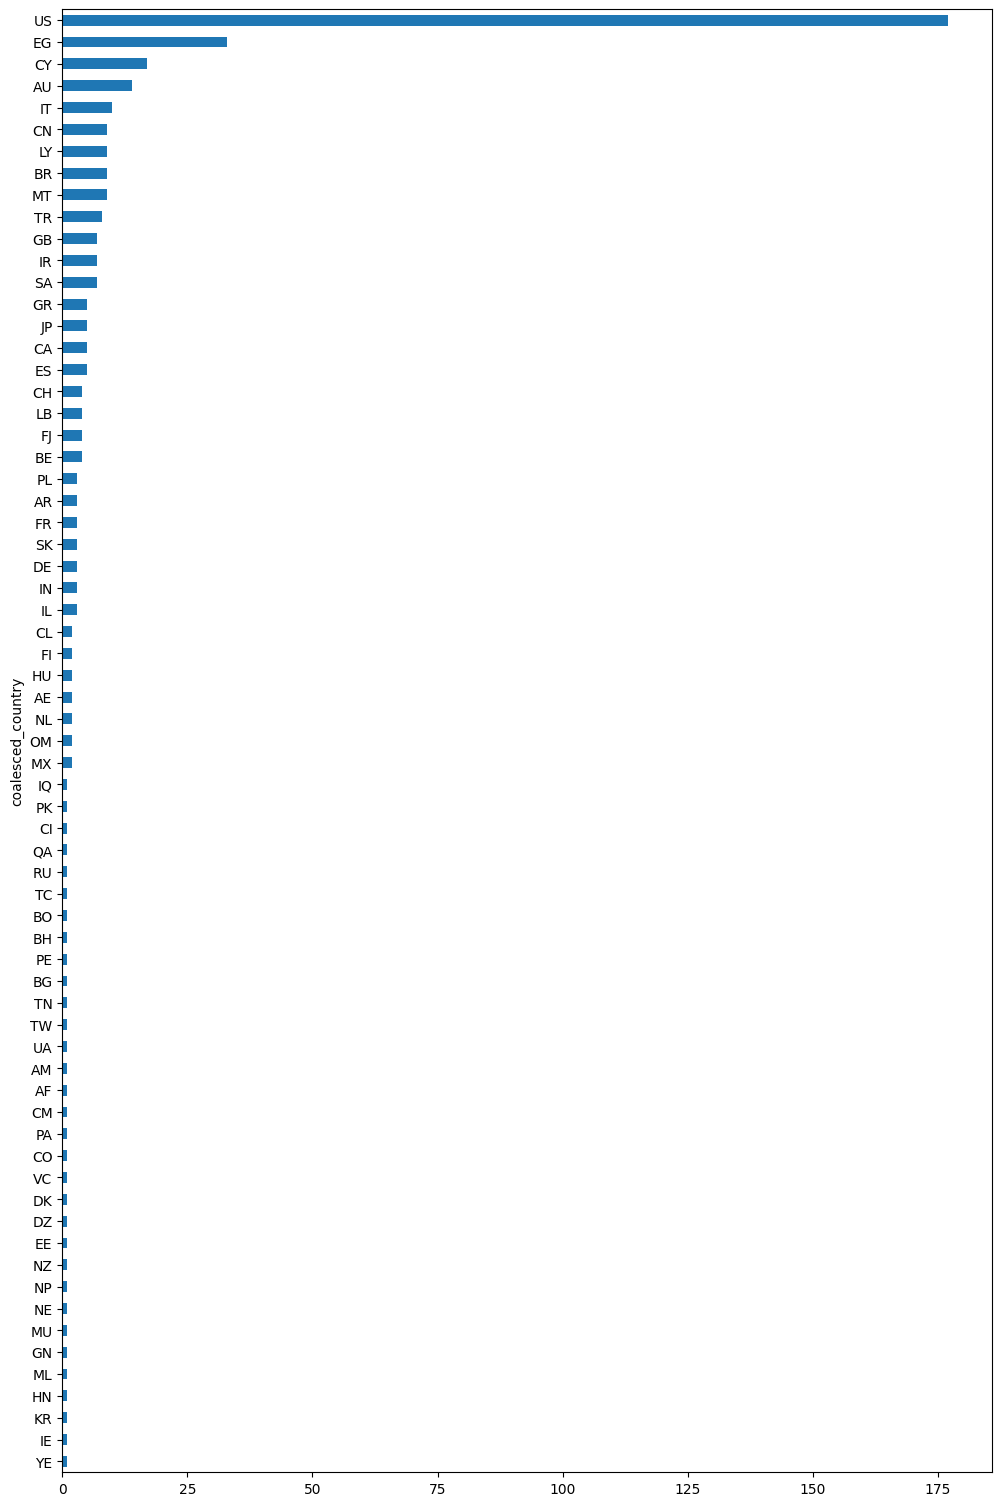

In [28]:
gps_disruption_df[gps_disruption_df['coalesced_country'].notna()]\
.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19])

In [29]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='FJ'] #mostly wrong, but much better than it used to be

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
138,01/16/2021 01:33 UTC,Global,Surveying,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit,07/19/2021,CNES has detected a repetition of IODE for PRN...,: The GPS Operations Center reviewed the GPS C...,2021-01-16,None,FJ-BFJ,FJ-01,None,NL-NES,None,FJ-BFJ,FJ
169,08/04/2020 08:42 UTC,Global,Surveying,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation,10/27/2020,User: CNES (Centre National d Etudes Spatiales...,: The GPS Operations Center reviewed the GPS C...,2020-08-04,None,FJ-BFJ,FJ-01,None,US-CER,CM-CE,FJ-BFJ,FJ
286,02/01/2019 00:00 UTC,Global,Surveying,User: Thanks to Navigation and Timing Monitori...,None,07/22/2019,User: Thanks to Navigation and Timing Monitori...,: The GPS Operations Center reviewed the GPS C...,2019-02-01,None,FJ-BFJ,FJ-01,None,US-UJL,MM-15,FJ-BFJ,FJ
356,11/30/2017 2200 UTC,Global,Other,User: GPS PRN22 orbit error started to wander ...,User Equipment,05/20/2019,User: GPS PRN22 orbit error started to wander ...,: The GPS Operations Center reported PRN 22 wa...,2017-11-30,None,FJ-BFJ,FJ-01,AU,US-BLY,CM-ES,FJ-BFJ,FJ


In [30]:
for user_desc in gps_disruption_df[gps_disruption_df['coalesced_country']=='FJ'] ['User']:
    print (user_desc)

CNES has detected a repetition of IODE for PRN09/SVN68 on January 16th, 2021. 
User: CNES (Centre National d Etudes Spatiales, French Space Agency) has detected a repetition of IODC for PRN19, SVN59 on August 4th, 2020. The detection is based on a consolidated navigation message file, built from RINEX navigation files issued by numerous IGS stations. Could you please confirm the IODC repetition? 
User: Thanks to Navigation and Timing Monitoring Facility. Since the begining of February we received several NANU reporting unscheduled outages of a few minutes for some GPS satellites. NANU 2019020, 2019026, 2019085, 2019086, 2019091, 2019093, and 2019095. For each NANU we analyzed rinex navigation and measurement files from stations in visibility of the satellites. In every case the satellites were healthy according to their broadcast ephemeris data. We never saw any measurement gap bias or drift that could be linked to a clock problem and we could not see any power drop. When the satellite

In [31]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='MT']  #all correct, no longer listing Reunion

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
67,11/04/2021 02:14 CET,Marsaxlokk. Malta,Marine,User indicated an intermittent problem that wa...,Unknown Interference,12/14/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-11-04,MT,MT-MAR,MT-28,None,US-LNP,PE-ICA,MT,MT
99,06/26/2021 0600 UTC,East of Malta,Marine,"User: Vessel bound from Algeciras, Spain to Po...",Unknown Interference,07/19/2021,"User: Vessel bound from Algeciras, Spain to Po...",: The GPS Operations Center reviewed the GPS C...,2021-06-26,MT,BR-MWT,CM-ES,EG,EG-PSD,FR-01,MT,MT
100,06/22/2021 0400 EEST,"At sea, 70NM East of Malta",Marine,User: Please be informed that early morning to...,Unknown Interference,07/19/2021,User: Please be informed that early morning to...,: The GPS Operations Center reviewed the GPS C...,2021-06-22,MT,BR-MWT,CM-ES,MT,SI-RNC,CM-ES,MT,MT
107,05/25/2021 22:00 EEST,"Malta Channel, Med",Marine,USER: All ships in the vicinity (60 nm reach o...,Unknown Interference,06/08/2021,USER: All ships in the vicinity (60 nm reach o...,: The GPS Operations Center reviewed the GPS C...,2021-05-25,MT,BR-MWT,None,MT,BR-MWT,FJ-11,MT,MT
122,04/21/2021 0039 GMT,Malta Channel,Marine,USER: GPS signal lost for 2 minutes. NAVCEN: T...,Unknown Interference,05/03/2021,USER: GPS signal lost for 2 minutes.,: The GPS Operations Center reviewed the GPS C...,2021-04-21,MT,BR-MWT,None,None,IT-ZTX,SI-037,MT,MT
128,02/10/2021 04:00 EEST,Between Malta and Sicily,Marine,User indicated an intermittent problem that wa...,Unknown Interference,03/01/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-02-10,MT,BR-MWT,None,None,US-LNP,PE-ICA,MT,MT
156,09/22/2020 1700 EEST,East of Malta,Marine,User: Ships in immediate vicinity are understo...,Unknown Interference,10/20/2020,User: Ships in immediate vicinity are understo...,: The GPS Operations Center reviewed the GPS C...,2020-09-22,MT,BR-MWT,CM-ES,None,IT-ZTX,SI-037,MT,MT
171,07/30/2020 17:00:00 CET,Malta,Other,User: Local authorities were contacted and it ...,Unknown Interference,09/10/2020,User: Local authorities were contacted and it ...,: The GPS Operations Center reviewed the GPS C...,2020-07-30,MT,BR-MWT,None,None,FR-NRF,CM-SU,MT,MT
235,08/01/2019 22:20 UTC,East of Malta,Marine,User: 01 Aug 2 GPS receivers have lost sat sig...,Unknown Interference,08/19/2019,User: 01 Aug 2 GPS receivers have lost sat sig...,: The GPS Operations Center reviewed the GPS C...,2019-08-01,MT,BR-MWT,CM-ES,None,SI-RNC,DZ-43,MT,MT


In [32]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='CM']  # wrong but only once

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
104,06/04/2021 0540 GMT,South of Sicily,Marine,USER: Various other vessels in the area encoun...,Unknown Interference,06/08/2021,USER: Various other vessels in the area encoun...,: The GPS Operations Center reviewed the GPS C...,2021-06-04,None,None,CM-SU,None,JP-SME,FR-83,CM-SU,CM


In [33]:
gps_disruption_df[gps_disruption_df['coalesced_country']=='PE']  #much better now

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
23,06/08/2022 12:00:00 EST,Eastern Peru,Aviation,"USER: On 6 occurrences over 90 minutes, GPS lo...",Unknown Interference,10/25/2022,"USER: On 6 occurrences over 90 minutes, GPS lo...",: The GPS Operations Center reviewed the GPS C...,2022-06-08,PE,US-VYS,GH-EP,ML,AQ-ESP,GN-ML,PE,PE


In [34]:
gps_disruption_df['coalesced_country'].dropna().unique()

array(['US', 'QA', 'CN', 'PA', 'GN', 'CA', 'IR', 'GR', 'AE', 'PE', 'TR',
       'EG', 'EE', 'BE', 'SA', 'IQ', 'LY', 'NP', 'AU', 'GB', 'IL', 'CH',
       'SK', 'BR', 'CY', 'MT', 'MU', 'PL', 'LB', 'IT', 'ML', 'TN', 'CM',
       'ES', 'TC', 'MX', 'TW', 'BH', 'FJ', 'IN', 'NL', 'FR', 'JP', 'AR',
       'HN', 'HU', 'IE', 'DK', 'PK', 'NZ', 'BO', 'CL', 'CO', 'UA', 'NE',
       'OM', 'FI', 'YE', 'AF', 'BG', 'VC', 'AM', 'DE', 'CI', 'DZ', 'KR',
       'RU'], dtype=object)

In [35]:
gps_disruption_df[gps_disruption_df['Location']=='Channel Islands, CA']['Description'].to_dict()

{401: 'User: Several systems, across all of our assets at sea, all affected NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported outage. Space Weather was reviewed and found unlikely to have impacted GPS performance. No correlating reports from other users or interagency partners. Authorized GPS testing was scheduled within 200 miles of the reported location and may have impacted GPS performance.'}

There is such a thing as https://en.wikipedia.org/wiki/Channel_Islands_(California)

In [36]:
gps_disruption_df[gps_disruption_df['coalesce']=='US-GA']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
8,08/18/2022 10:30:00 EST,Cartersville Georgia,Transportation,USER: Tractor trailers on coming in a resident...,Mapping Issue,08/23/2022,USER: Tractor trailers on coming in a resident...,sent data mapping information to report unaut...,2022-08-18,US-GA,US-VYZ,US-GA,None,CA-TRL,FJ-11,US-GA,US
147,10/20/2020 11:00 am EST,Stockbridge and McDonough GA,Transportation,"User: Kept reporting ""GPS Network Unavailable""...",Insufficient Information,10/27/2020,"User: Kept reporting ""GPS Network Unavailable""...",: The GPS Operations Center reviewed the GPS C...,2020-10-20,US-GA,GB-SBD,None,None,US-XKE,SI-037,US-GA,US
366,10/10/2017 0920 EST,"Macon, GA",Other,User: GPS unit could not ﬁx any satellites unt...,User Equipment,05/20/2019,User: GPS unit could not ﬁx any satellites unt...,: The GPS Operations Center reviewed the GPS C...,2017-10-10,US-GA,BE-MCO,None,None,IT-ZRC,PE-ICA,US-GA,US
405,03/04/2017 2015 EST,"Lyons, GA",Transportation,User: Our home is located on the west side of ...,Mapping Issue,05/20/2019,User: Our home is located on the west side of ...,: User provided information on how to contact ...,2017-03-04,US-GA,US-LZY,None,None,CA-YYI,NG-RI,US-GA,US


<AxesSubplot: ylabel='matched_user_country_state'>

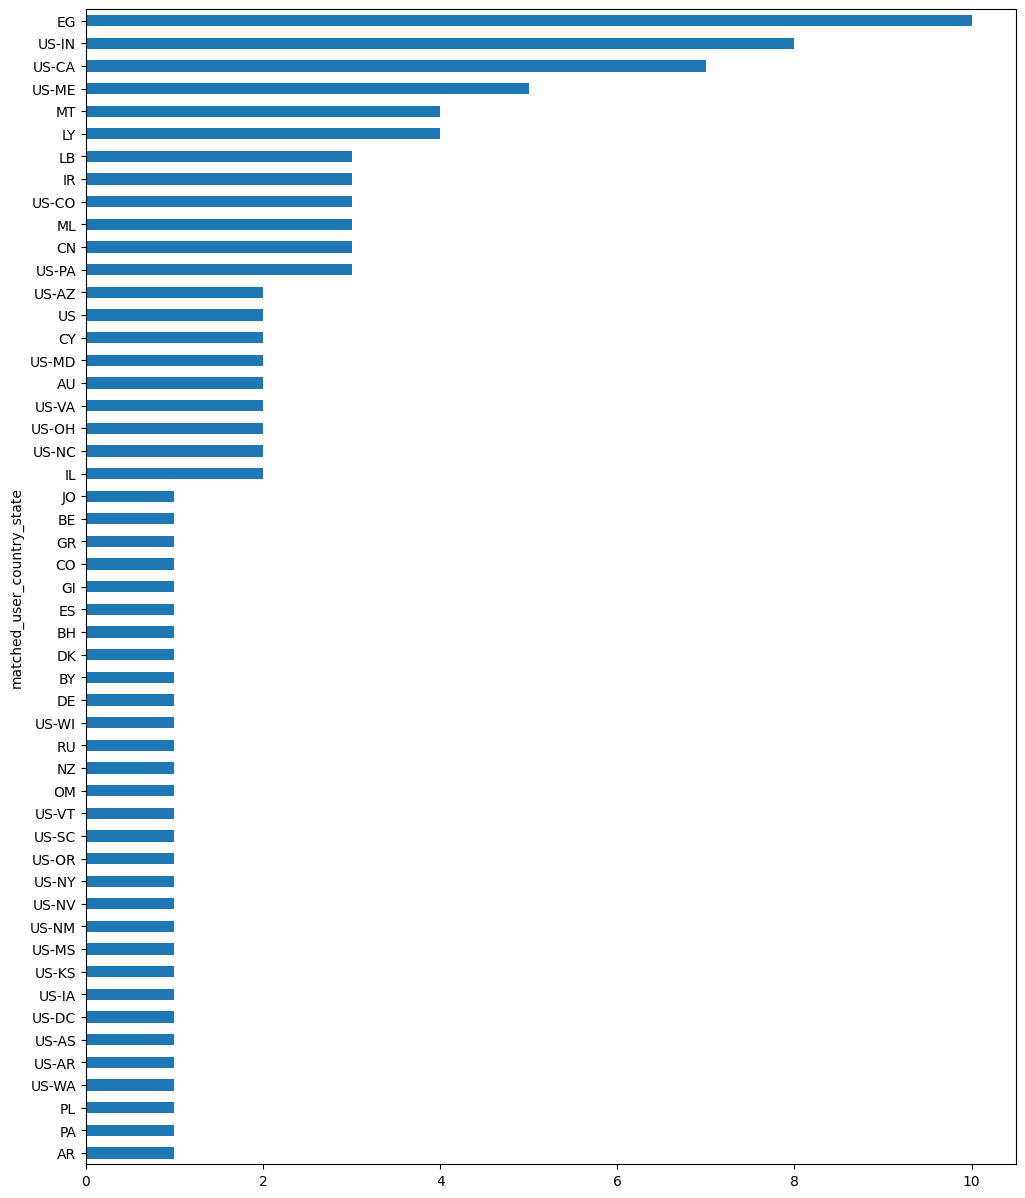

In [37]:
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()]\
.groupby('matched_user_country_state').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

<AxesSubplot: ylabel='matched_location_detail_locode'>

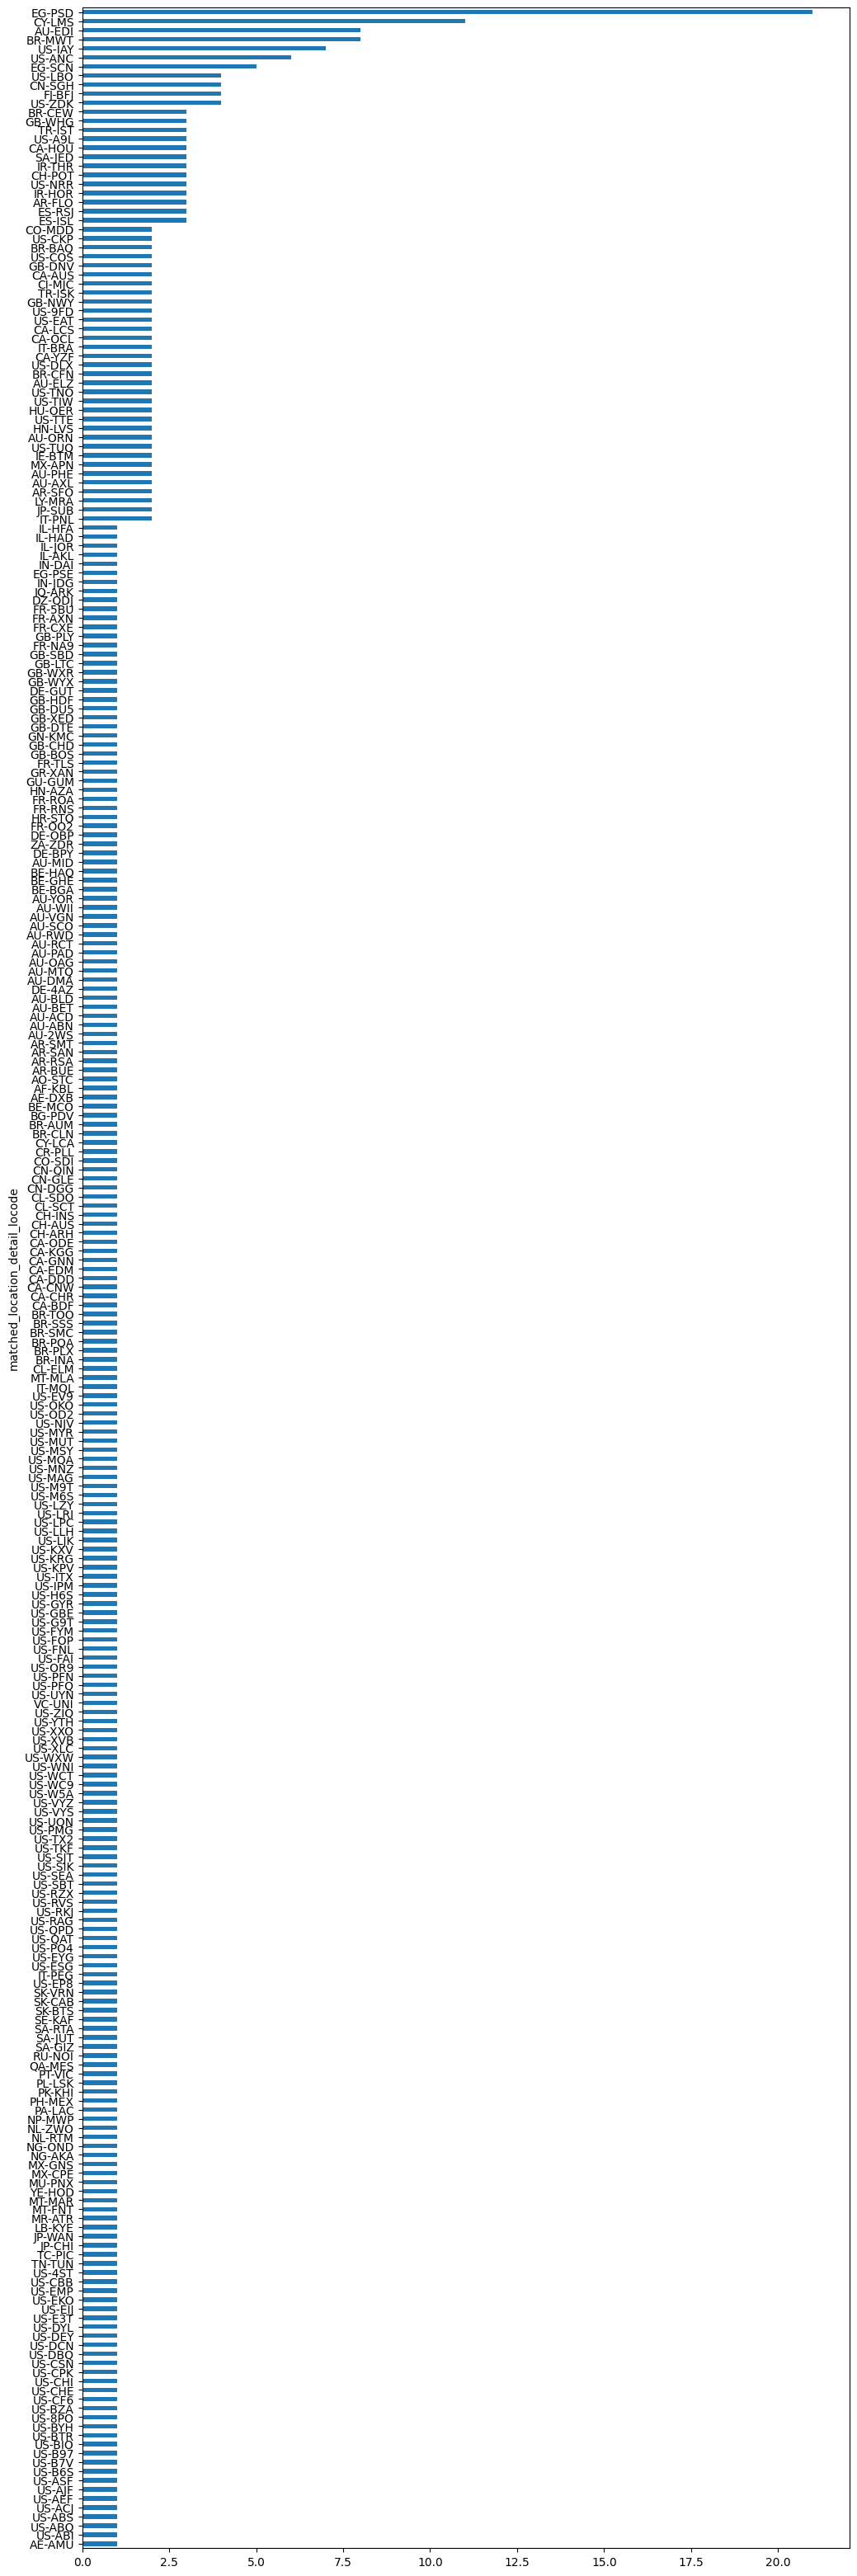

In [38]:
gps_disruption_df[gps_disruption_df['matched_location_detail_locode'].notna()]\
.groupby('matched_location_detail_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,40])

<AxesSubplot: ylabel='matched_location_locode'>

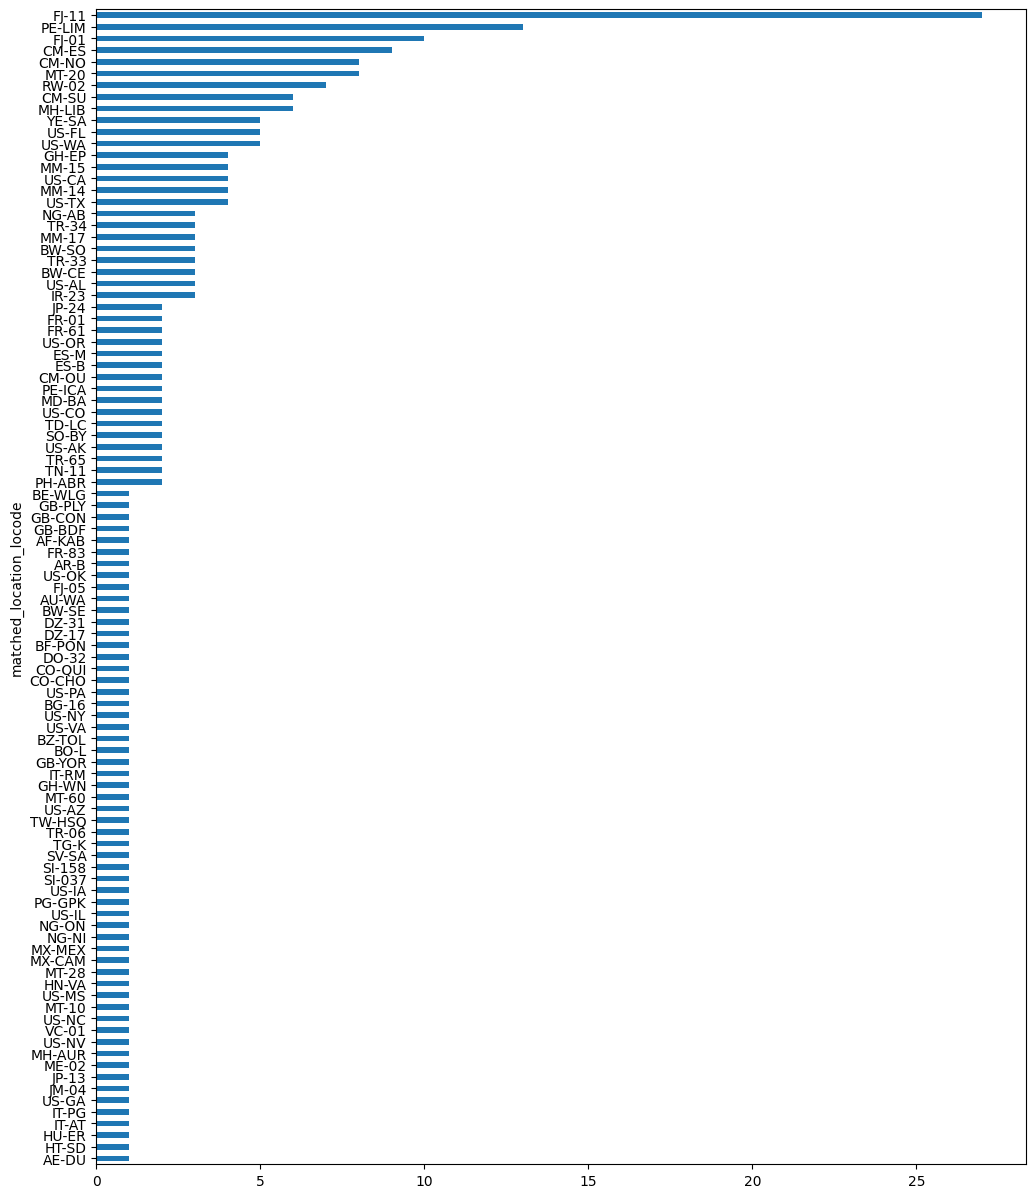

In [39]:
gps_disruption_df[gps_disruption_df['matched_location_locode'].notna()]\
.groupby('matched_location_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

<AxesSubplot: ylabel='matched_user_detail_locode'>

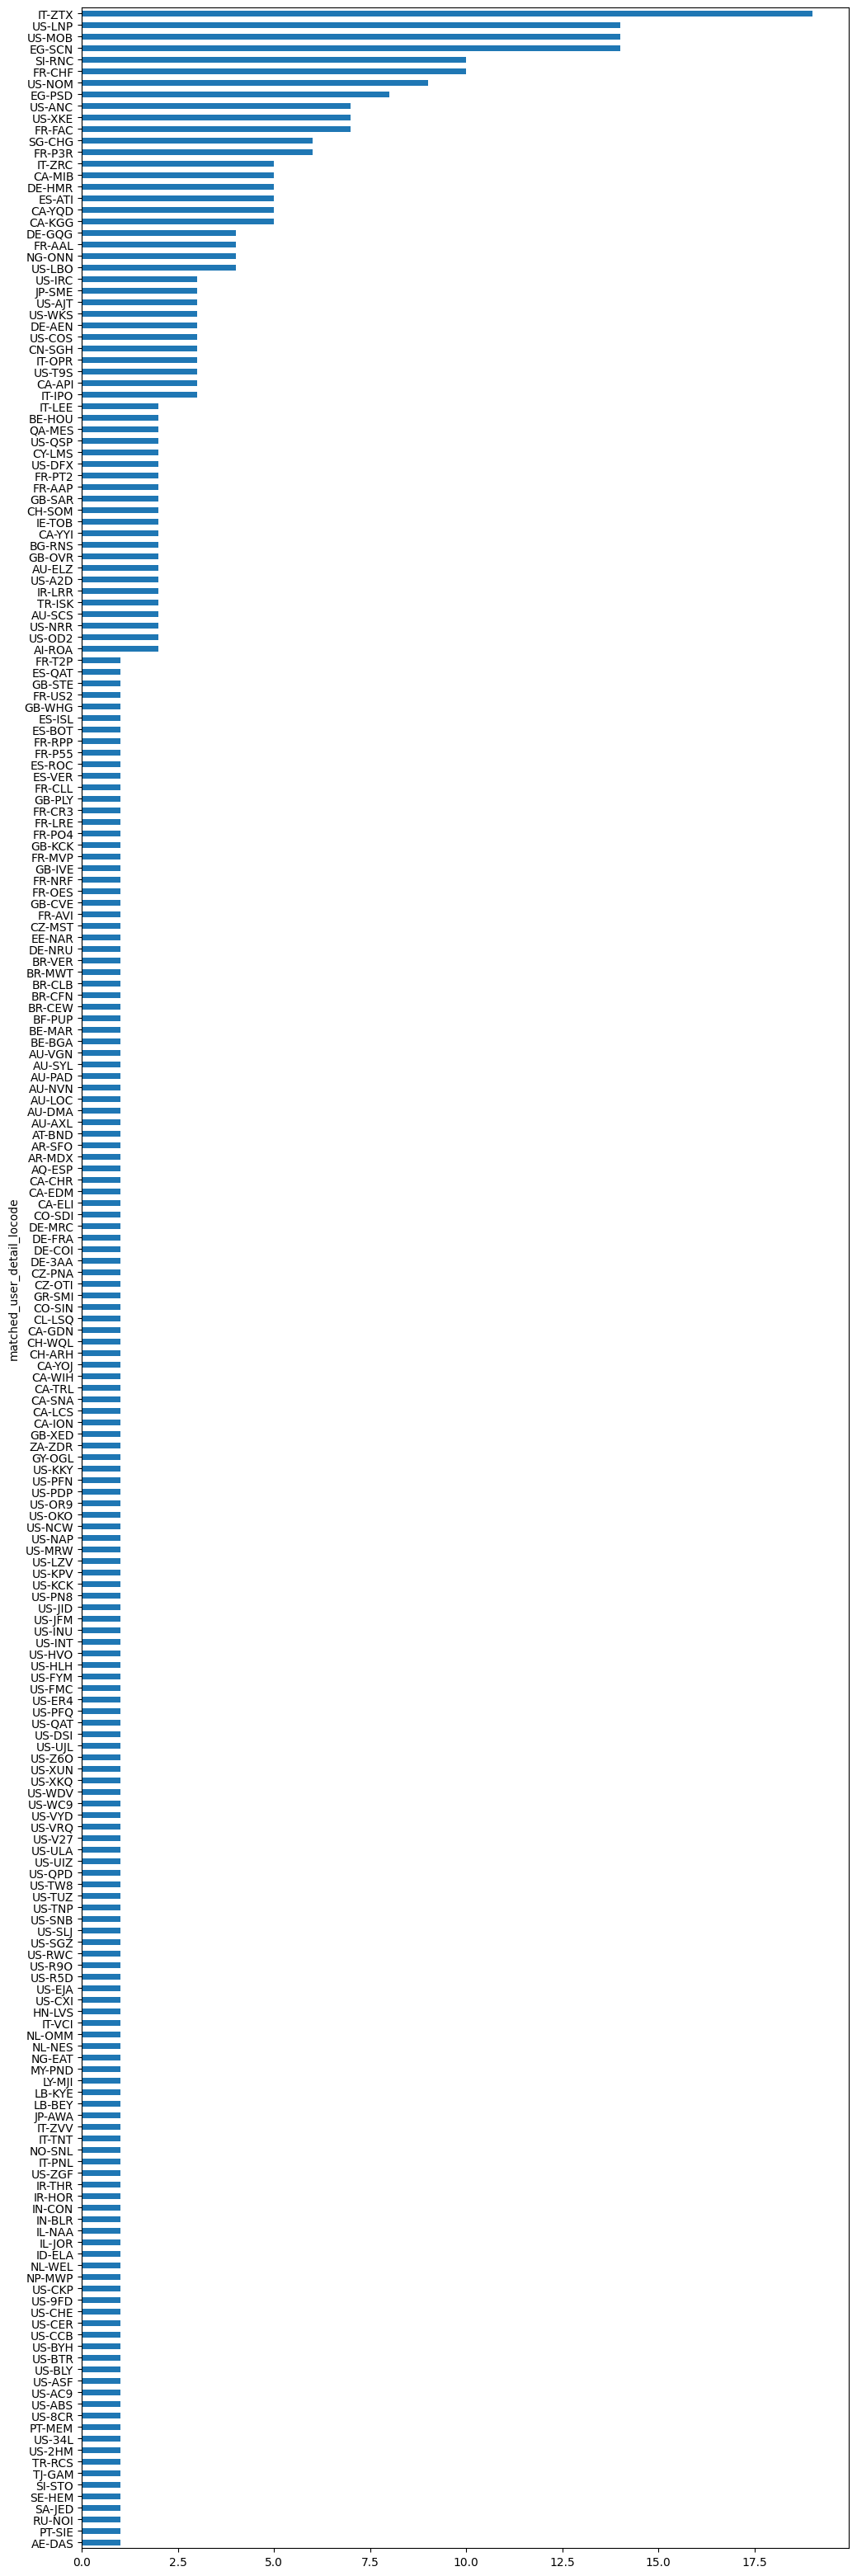

In [40]:
gps_disruption_df[gps_disruption_df['matched_user_detail_locode'].notna()]\
.groupby('matched_user_detail_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,40])

<AxesSubplot: ylabel='matched_user_locode'>

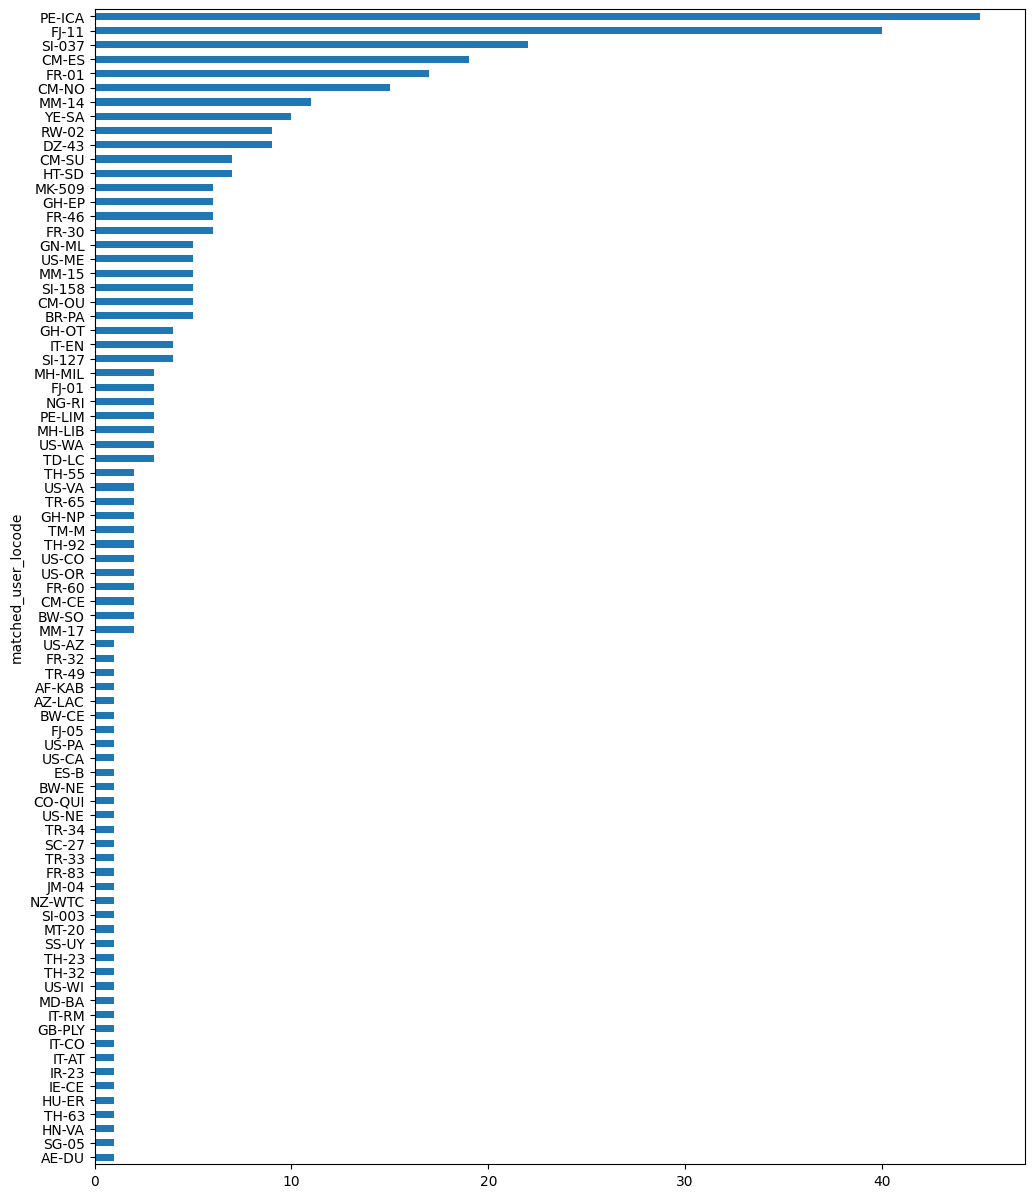

In [41]:
gps_disruption_df[gps_disruption_df['matched_user_locode'].notna()]\
.groupby('matched_user_locode').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,15])

In [42]:
gps_disruption_df[gps_disruption_df['coalesce']=='US-IN']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
293,11/10/2018 09:00 CST,"Evansville, IN",First Responder,User: On 22 October the units began reporting ...,User Equipment,05/08/2019,User: On 22 October the units began reporting ...,: The GPS week number for both dates are the s...,2018-11-10,US-IN,US-EV9,TR-65,None,US-XKE,None,US-IN,US
316,08/03/2018 11:30 EST,"Avon, IN",Other,User: My son wears a GPS watch due to the poss...,User Equipment,05/07/2019,User: My son wears a GPS watch due to the poss...,: The GPS Operations Center reviewed the GPS C...,2018-08-03,US-IN,FR-AXN,None,US-IN,US-CCB,PE-ICA,US-IN,US


In [43]:
gps_disruption_df[gps_disruption_df['matched_location_country_state']=='US-IN']



,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
293,11/10/2018 09:00 CST,"Evansville, IN",First Responder,User: On 22 October the units began reporting ...,User Equipment,05/08/2019,User: On 22 October the units began reporting ...,: The GPS week number for both dates are the s...,2018-11-10,US-IN,US-EV9,TR-65,None,US-XKE,None,US-IN,US
316,08/03/2018 11:30 EST,"Avon, IN",Other,User: My son wears a GPS watch due to the poss...,User Equipment,05/07/2019,User: My son wears a GPS watch due to the poss...,: The GPS Operations Center reviewed the GPS C...,2018-08-03,US-IN,FR-AXN,None,US-IN,US-CCB,PE-ICA,US-IN,US


In [44]:
gps_disruption_df[gps_disruption_df['matched_user_country_state'].notna()]




,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,USER: My mapping services are constantly searc...,sent data mapping information.,2022-10-16,None,US-IPM,None,US-KS,US-KCK,YE-SA,US-IPM,US
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022,USER: Our car navigation system and our mobile...,: The GPS Operations Center reviewed the GPS C...,2022-09-17,US-DC,GB-WHG,US-WA,US-DC,GB-WHG,US-WA,US-DC,US
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022,"USER: Several times, most recently yesterday, ...",sent data mapping information.,2022-09-07,US-SC,US-CKP,None,US-SC,US-CKP,CM-ES,US-SC,US
6,09/01/2022 16:51:00 Eastern African Time,Mesaieed Main Ship Channel,Marine,USER: At 1651 while transiting Mesaieed Main S...,Unknown Interference,09/13/2022,USER: At 1651 while transiting Mesaieed Main S...,: The GPS Operations Center reviewed the GPS C...,2022-09-01,None,QA-MES,FR-01,US-ME,QA-MES,US-ME,QA-MES,QA
7,08/31/2022 21:27:00 China Taiwan Time,Caofeidian anchorage / Bohai Sea – China,Marine,USER: 31.Aug.2022 / 1327 - 1333 UTC. GPS SHOWS...,Unknown Interference,10/25/2022,USER: 31.Aug.2022 / 1327 - 1333 UTC. GPS SHOWS...,: The GPS Operations Center reviewed the GPS C...,2022-08-31,CN,US-ANC,MM-14,US-IN,SG-CHG,PE-ICA,CN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,06/22/2017 1010 Eastern African Time,"Black Sea, Novorossiysk, Russia",Marine,User: GPS equipment unable to obtain GPS signa...,Unknown Interference,05/20/2019,User: GPS equipment unable to obtain GPS signa...,: See U.S. Maritime Alerts 2017-005A-GPS Inter...,2017-06-22,RU,RU-NOI,TD-LC,RU,RU-NOI,PE-ICA,RU,RU
400,04/11/2017 1253 PST,"Gutersloh, Germany",Agriculture,"User: Farmers in Gugersahol, Germany are repor...",User Equipment,05/20/2019,"User: Farmers in Gugersahol, Germany are repor...",: The GPS Operations Center reviewed the GPS C...,2017-04-11,DE,DE-GUT,None,DE,US-JFM,FR-32,DE,DE
404,03/10/2017 5:30 PM PST,"Condon, OR",Automobile,"User: Travelled to Condon, Oregon on remote, u...",User Equipment,05/20/2019,"User: Travelled to Condon, Oregon on remote, u...",: The GPS Operations Center reviewed the GPS C...,2017-03-10,US-OR,NG-OND,NG-ON,US-OR,US-OR9,US-OR,US-OR,US
406,03/01/2017 1743 Indiana Eastern Standard Time,"Clarion, PA",NaN,User: Unit has 1-2 bars of signal in an area c...,User Equipment,05/20/2019,User: Unit has 1-2 bars of signal in an area c...,: The GPS Operations Center reviewed the GPS C...,2017-03-01,US-PA,US-LRI,None,US-PA,AU-SYL,US-PA,US-PA,US


### No Unmatched locations

In [45]:
disruptions_by_location=gps_disruption_df[gps_disruption_df['coalesce'].isna()].groupby('Location').count()['Disruption Date/Time']


In [46]:
disruptions_by_location[disruptions_by_location>1].sort_values(ascending=False)#.plot(kind='barh')

Series([], Name: Disruption Date/Time, dtype: int64)

In [47]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description','Cause','coalesce']]

,local_date,Location,Description,Cause,coalesce
91,2021-07-28,At sea,USER: The vessel was sailing towards port said...,Unknown Interference,EG-SCN
138,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit,FJ-BFJ
169,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation,FJ-BFJ
195,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a...",ICD_Violation,HU-OER
286,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...,None,FJ-BFJ
356,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...,User Equipment,FJ-BFJ
372,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...,User Equipment,HU-OER


In [48]:
gps_disruption_df.query('Location=="United States"')[['Description','coalesce']]

,Description,coalesce
277,At roughly 8:45 PM CST lost GPS Sync to variou...,US
287,User: Observation of GPS NANU times in relatio...,US


In [49]:
for description_str in gps_disruption_df.query('Location=="United States"')['Description']:
    print(description_str)

At roughly 8:45 PM CST lost GPS Sync to various cell sites around the US. The common GPS is trend is dual cones feeding sync to UMTS and LTE technologies. To mitigate the issue Field Technicians have removed one of the GPS cones and have a master sync from LTE feeding UMTS. There was no back office or architectural changes to our network during this time that would have caused this failure. We are curious if there were any changes made in preparation of the GPS System rollover slated for tomorrow April 6th that may have affected the base stations to lose sync. NAVCEN: The U.S. Air Force points to Interface Specification IS-GPS-200, paragraph 20.3.3.5.2.2, Almanac Reference Time, which states: "The almanac reference time, t(oa), is some some multiple of 2(12) seconds occurring approximately 70 hours after the first valid transmission time for this almanac data set (reference 20.3.4.5). The almanac is updated often enough to ensure that GPS time, t, shall differ from t(oa) by less than 3

In [50]:
gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')\
[['Description','matched_location_country_state','matched_user_country_state','coalesce','NAVCEN']]

,Description,matched_location_country_state,matched_user_country_state,coalesce,NAVCEN
110,User indicated an intermittent problem that wa...,None,None,AU-EDI,: The GPS Operations Center reviewed the GPS C...
120,USER: roughly 12 hours of gps spoofing upon de...,None,EG,AU-EDI,: The GPS Operations Center reviewed the GPS C...
123,Lost GPS signal for six-minutes from 1620 GMT ...,None,None,AU-EDI,: The GPS Operations Center reviewed the GPS C...
124,"GPS jamming begins, affecting both GPS units. ...",None,None,AU-EDI,: The GPS Operations Center reviewed the GPS C...
152,User: Additional vessel in area were experienc...,None,None,AU-EDI,: The GPS Operations Center reviewed the GPS C...
154,User: Intermittent GPS signal beginning at 013...,None,None,AU-EDI,: The GPS Operations Center reviewed the GPS C...


In [51]:
for description_str in gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')\
['Description']:
    print(description_str)
    #still not picking port said egypt here

User indicated an intermittent problem that was otherwise unspecified. NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from interagency partners. The report of interference is similar to that outlined by U.S. Maritime Administration in Maritime Advisory 2021-004-Various GPS Interference. User encouraged to report the issue to the nearest communication authority.
USER: roughly 12 hours of gps spoofing upon departure from port Said Egypt. GPS signal rapidly shifted numerous times, position 6-8 miles off. Position dropped for 90 percent of the 12 hours. GPS aboard connected to ECDIS, RADAR,AIS, GYRO repeater panel, GMDSS suite. NAVCEN: The GPS Operations Center reviewed the GPS Constella

<AxesSubplot: title={'center': 'Entries not about interference'}, ylabel='coalesced_country'>

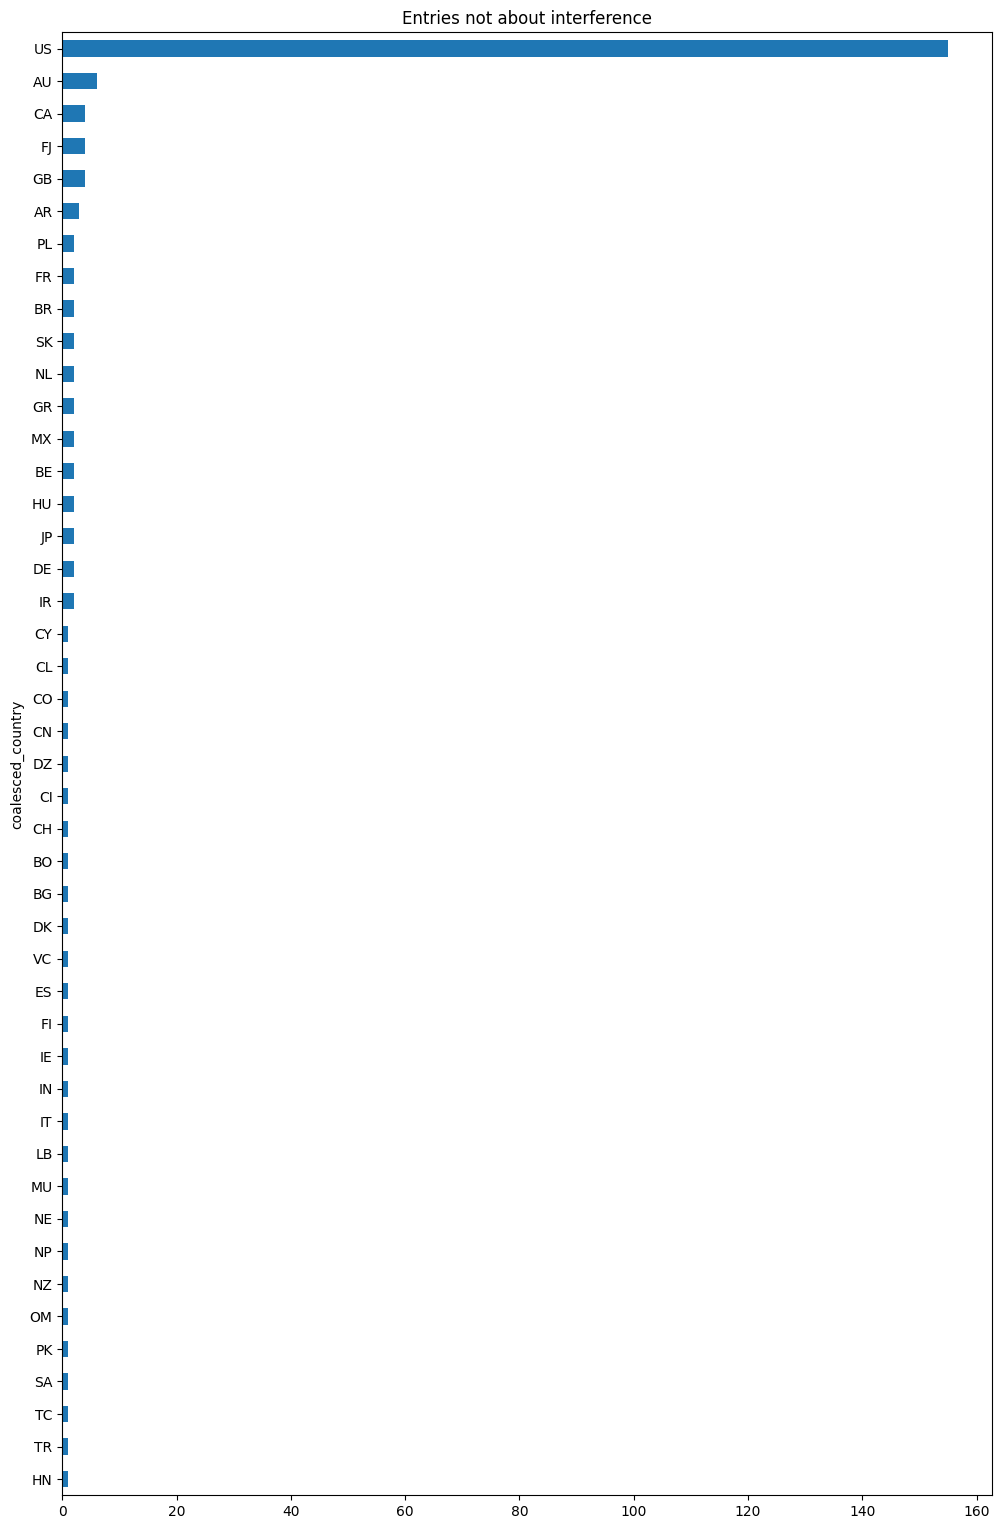

In [52]:
gps_disruption_df[gps_disruption_df['coalesced_country'].notna() & ~gps_disruption_df['Cause'].str.contains('Interference')]\
.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19],title='Entries not about interference')

Note the US dominating this list.

<AxesSubplot: title={'center': 'Entries about Interference'}, ylabel='coalesced_country'>

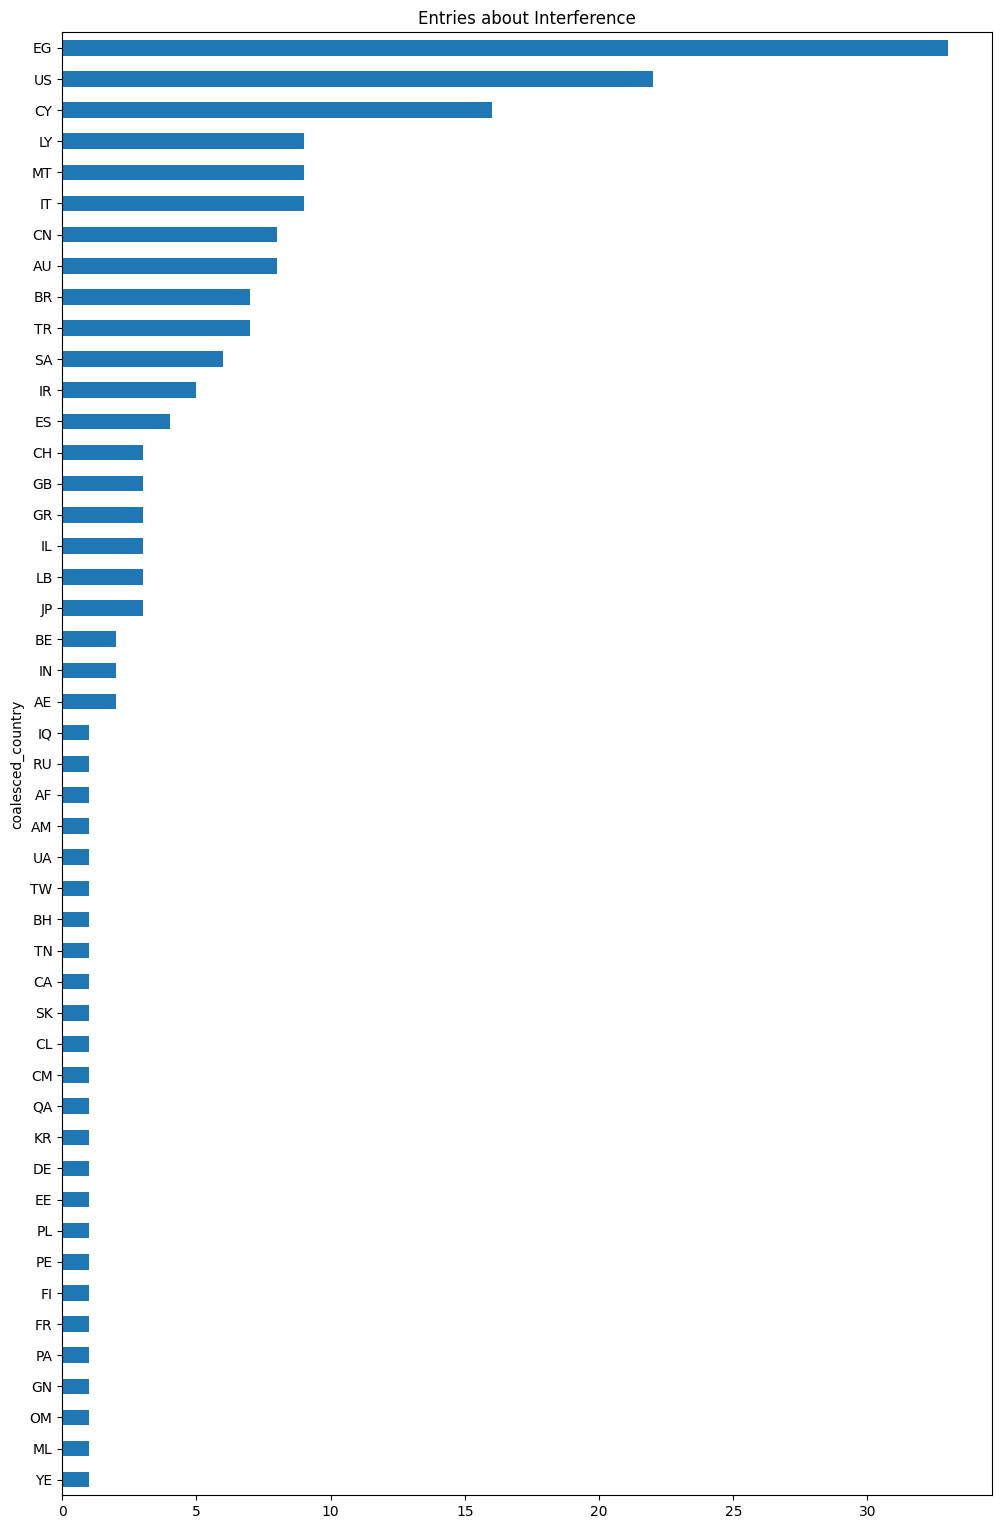

In [54]:
gps_disruption_df[gps_disruption_df['coalesced_country'].notna() & gps_disruption_df['Cause'].str.contains('Interference')]\
.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19],title='Entries about Interference')

US is still high in this list but the mediterranean countries form the other top cluster

### Unmatched locations

In [55]:
gps_disruption_df[gps_disruption_df['coalesce'].isna()]

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,matched_location_country_state,matched_location_detail_locode,matched_location_locode,matched_user_country_state,matched_user_detail_locode,matched_user_locode,coalesce,coalesced_country


### quantify scale of each subgroup

In [56]:
gps_disruption_df['coalesce'].nunique()

175

In [57]:
gps_disruption_df['coalesce'].count()

419

In [58]:
gps_disruption_df[gps_disruption_df['coalesced_country'].isna()]['Disruption Date/Time'].count()

0

In [64]:
gps_disruption_df\
.drop(['matched_location_country_state','matched_location_detail_locode','matched_location_locode','matched_user_country_state','matched_user_detail_locode','matched_user_locode','coalesce'],axis=1)\
.to_csv('gps_disruptions_per_country.csv',index=False)